histogram time 0.000374
lpf time 0.000779
local peaks time 0.011245
vectorize time 0.000581
calculate colors time 0.013816
extract lines from image time 0.000097
dbscan data size 66 
   db scan time 0.002047
extract lines from image time 0.008043


/opt/conda/lib/python3.6/site-packages/scipy/ndimage/interpolation.py:600: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


[array([[ 0.37254902,  0.7880021 ],
        [ 0.54901961,  0.71121029]]), array([[ 0.35294118,  0.76431127],
        [ 0.49019608,  0.83005367]])]

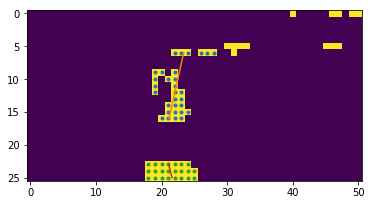

In [90]:
import sys
import numpy as np
from scipy import ndimage
from scipy.misc import imsave
import matplotlib.pyplot as plt
from scipy.cluster.vq import vq, kmeans, whiten
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.signal import argrelextrema
%matplotlib inline

im = ndimage.imread('0000.jpg', mode='L')

im = ndimage.zoom(im[im.shape[0]//3:,:], 0.5)
# im = ndimage.filters.maximum_filter(im, size=(5,5))
plt.imshow(im)

import sensor_camera
import importlib
importlib.reload(sensor_camera)
a = sensor_camera.extract_lines(im, plot=plt)

a


line 0.372549 0.788002 -> 0.549020 0.711210
line centroid 0.460784 0.749606
line 0.352941 0.764311 -> 0.490196 0.830054
line centroid 0.421569 0.797182


(array([ 0.44346742,  0.77061496]), (28.381915152616997, 24.659678682593764))

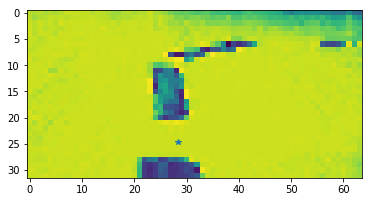

In [93]:
importlib.reload(sensor_camera)
pos = sensor_camera.calculate_direction(a)
plt.imshow(im)
plt.autoscale(False)
c = (pos[0]*im.shape[1], pos[1]*im.shape[0])
plt.plot(c[0], c[1], '*')
pos, c

histogram time 0.001240
lpf time 0.000276
local peaks time 0.024760
vectorize time 0.000126


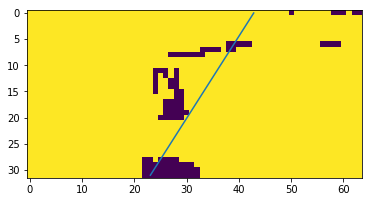

In [137]:
maxs, paletted = sensor_camera.calculate_colors(im)
x, y = np.where(paletted == maxs[0][0])
pfd = np.polyfit(x, y, 1)

xp = np.linspace(np.min(x), np.max(x) , 100)
p = np.poly1d(pfd)
plt.imshow(paletted)
plt.autoscale(False)
plt.plot(p(xp), xp, '-')



histogram time 0.000274
lpf time 0.000633
local peaks time 0.009693
vectorize time 0.000083
calculate colors time 0.011180
min x 0.000000 maxx 31.000000
min y 22.000000 maxy 63.000000
(32, 64)
line 0.000000 0.669468 -> 0.968750 0.360846
line centroid 0.484375 0.515157


(array([  0.,  31.]), array([ 42.84594384,  23.09412376]))

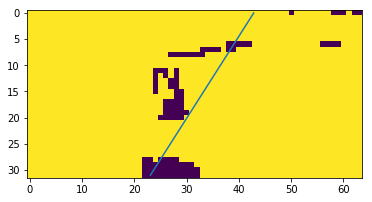

In [221]:
importlib.reload(sensor_camera)

plt.imshow(paletted)
line = sensor_camera.extract_line_simple(im, plt)
pos = sensor_camera.calculate_direction([line])

#plt.autoscale(False)
c = (pos[0]*paletted.shape[0], pos[1]*paletted.shape[1])
#plt.plot(c[1], c[0], '*', line[:,1]*paletted.shape[1],line[:,0]*paletted.shape[0], '-')
line[:,0]*paletted.shape[0], line[:,1]*paletted.shape[1]